<a href="https://colab.research.google.com/github/aamirkhanov/Mu2eANL/blob/master/CRVEff/SectorEffEstimation_Artem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Init

In [1]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
from scipy.interpolate import interp1d
!pip install uncertainties
from uncertainties import ufloat, unumpy

%pip -q install uproot3
%pip -q install --upgrade tables
import uproot3

# This allows you to run on Colaboratory and load files from your Google Drive
try:
    from google.colab import drive
    drive.mount("/content/drive")
    main_path = '/content/drive/MyDrive/'
except:
    main_path = ''
sys.path.append(main_path)
sys.path.append(main_path+'root_files_dzhadan')
import math

!pip install fsspec
import dask.dataframe as dd

S = pow(100*100, 2) #100x100 m2 in cm2 - simulated area

     |████████████████████████████████| 98 kB 3.8 MB/s 
     |████████████████████████████████| 117 kB 5.1 MB/s 
     |████████████████████████████████| 87 kB 6.0 MB/s 
Mounted at /content/drive
     |████████████████████████████████| 133 kB 5.0 MB/s 


In [2]:
!pip install -I git+https://github.com/oksuzian/mu2etools.git
from mu2etools import utils, cuts

  Cloning https://github.com/oksuzian/mu2etools.git to /tmp/pip-req-build-7nvlmr4a
  Running command git clone -q https://github.com/oksuzian/mu2etools.git /tmp/pip-req-build-7nvlmr4a
  Created wheel for mu2etools: filename=mu2etools-0.0.1-py3-none-any.whl size=5911 sha256=d295ea0fdd1a0e62fc9802113416ded0012e82410e5f5a5809517804f4a31421
  Stored in directory: /tmp/pip-ephem-wheel-cache-rzrq15vp/wheels/00/92/a8/d2a2c55928a20d8675652a7135b8880f1f4f9b655d8885d452
Successfully built mu2etools


In [3]:
plt.style.use('seaborn-whitegrid')
plt.rcParams["grid.linestyle"] = (5,15)
plt.rcParams["grid.linewidth"] = 1.0
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 22})

crvSectorNames = list(utils.CRV_SECTOR_NAMES_V7.keys())
crvSectorType = {"R1":1,"R2":1,"R3":1,"R4":1,"R5":1,"L1":2,"L2":2,"T1":3,"T2":3,"T3":3,"T4":3,"E1":4,"E2":4,"U":5,"D1":6,"D2":6,"D3":6,"D4":6,"C1":7,"C2":7,"C3":7,"C4":7}



#Plot CRY4

In [4]:
try:
    dfCRY4
except NameError:
    dfCRY4 = pd.read_hdf(main_path + "root_files_cry4/cry4df_Artem2.h5")

In [5]:
cuts.cut_pid_trkqual_ue

'(dequal_TrkQual > 0.8) & (dequal_TrkPID > 0.95) & (ue_status <= 0)'

In [ ]:
!ls drive/MyDrive/Mu2e/ImagesFromColab/


C1_CoordinatesNotVetoed.png  L2_Efficiency.png
C1_Efficiency.png	     R1_CoordinatesNotVetoed.png
C2_CoordinatesNotVetoed.png  R1_Efficiency.png
C2_Efficiency.png	     R2_CoordinatesNotVetoed.png
C3_CoordinatesNotVetoed.png  R2_Efficiency.png
C3_Efficiency.png	     R3_CoordinatesNotVetoed.png
D1_CoordinatesNotVetoed.png  R3_Efficiency.png
D1_Efficiency.png	     R4_CoordinatesNotVetoed.png
D2_CoordinatesNotVetoed.png  R4_Efficiency.png
D2_Efficiency.png	     R5_CoordinatesNotVetoed.png
D3_CoordinatesNotVetoed.png  R5_Efficiency.png
D3_Efficiency.png	     T1_CoordinatesNotVetoed.png
D4_CoordinatesNotVetoed.png  T1_Efficiency.png
D4_Efficiency.png	     T2_CoordinatesNotVetoed.png
E1_CoordinatesNotVetoed.png  T2_Efficiency.png
E1_Efficiency.png	     T3_CoordinatesNotVetoed.png
E2_CoordinatesNotVetoed.png  T3_Efficiency.png
E2_Efficiency.png	     T4_CoordinatesNotVetoed.png
ForPresentation		     T4_Efficiency.png
L1_CoordinatesNotVetoed.png  U_CoordinatesNotVetoed.png
L1_Efficiency.png	    

In [ ]:
def saveScatterPlots(lyield):
  #plt.figure(figsize = [32, 88])

  dftmp = dfCRY4.query('_z>-80000 & abs(_pdgId)==13 & lyield==%d' % lyield)
  #dftmp = dfCRY4.query('_z>-80000 & lyield==%d' % lyield)
  #for crvSectorNumber in range(12,14):
  for crvSectorNumber in range(0,21):
    plt.clf()
    crvSectorName = crvSectorNames[crvSectorNumber]
    crvSectorTypeNumber = crvSectorType[crvSectorName]
    crvSectorTypeName = crvSectorName[0:1]

    dftmpForSecType=dftmp.query('_crvSectorType==%d' % crvSectorTypeNumber)
    dftmpForSecNumber=dftmpForSecType.query('_crvSectorNumber==%d' % crvSectorNumber)
    #plt.figure()
    print("Sector Number = %d, Sector type is %s" % (crvSectorNumber, crvSectorTypeName))
    #plt.subplot(11, 2, crvSectorNumber+1)

    if crvSectorTypeName == "R" or crvSectorTypeName == "L": x_coord = "_z"; y_coord = "_y";
    elif crvSectorTypeName == "T": x_coord = "_z"; y_coord = "_x";
    elif crvSectorTypeName == "D" or crvSectorTypeName == "U": x_coord = "_x"; y_coord = "_y";
    elif crvSectorTypeName == "E": x_coord = "_z"; y_coord = "_x";
    else: x_coord = "_x"; y_coord = "_z"; 

    plt.plot(dftmpForSecType.get(x_coord), dftmpForSecType.get(y_coord), '.', color='tab:orange');

    plt.plot(dftmpForSecNumber.get(x_coord), dftmpForSecNumber.get(y_coord), '.', color='tab:blue');
    #plt.plot(dftmpForSecNumber.query('crvinfo__timeWindowStart<0').get(x_coord), dftmpForSecNumber.query('crvinfo__timeWindowStart<0').get(y_coord), '.');
    plt.plot(dftmpForSecNumber.query(cuts.cut_pid_trkqual_ue + '& crvinfo__timeWindowStart<0').get(x_coord), dftmpForSecNumber.query(cuts.cut_pid_trkqual_ue + '& crvinfo__timeWindowStart<0').get(y_coord), 'o', color='black');
    plt.plot(dftmpForSecNumber.query(cuts.cut_nomom + '& crvinfo__timeWindowStart<0').get(x_coord), dftmpForSecNumber.query(cuts.cut_nomom + '& crvinfo__timeWindowStart<0').get(y_coord), 'o', color='tab:red');

    plt.title(crvSectorName)
    plt.xlabel(x_coord[1:2])
    plt.ylabel(y_coord[1:2])
    #plt.savefig("drive/MyDrive/Mu2e/ImagesFromColab/%s_CoordinatesNotVetoed_all_pdgId_%d" % (crvSectorName,lyield))
    plt.savefig("drive/MyDrive/Mu2e/ImagesFromColab/%s_CoordinatesNotVetoed_pdgId_13_%d" % (crvSectorName,lyield))

Sector Number = 0, Sector type is R
Sector Number = 1, Sector type is R
Sector Number = 2, Sector type is R
Sector Number = 3, Sector type is R
Sector Number = 4, Sector type is R
Sector Number = 5, Sector type is L
Sector Number = 6, Sector type is L
Sector Number = 7, Sector type is T
Sector Number = 8, Sector type is T
Sector Number = 9, Sector type is T
Sector Number = 10, Sector type is T
Sector Number = 11, Sector type is E
Sector Number = 12, Sector type is E
Sector Number = 13, Sector type is U
Sector Number = 14, Sector type is D
Sector Number = 15, Sector type is D
Sector Number = 16, Sector type is D
Sector Number = 17, Sector type is D
Sector Number = 18, Sector type is C
Sector Number = 19, Sector type is C
Sector Number = 20, Sector type is C


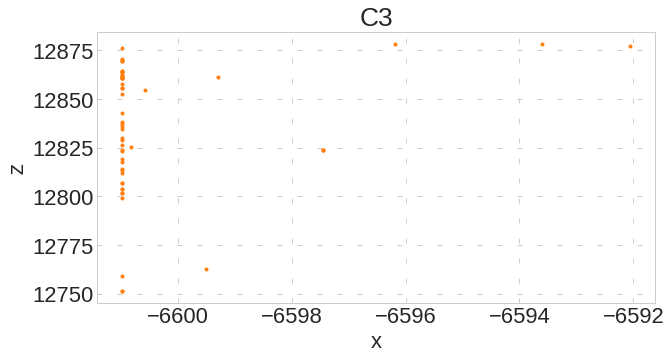

In [ ]:
saveScatterPlots(17000)

In [ ]:
def drawScatterPlots(lyield):
  plt.figure(figsize = [32, 88])

  dftmp = dfCRY4.query('_z>-80000 & abs(_pdgId)==13 & lyield==%d' % lyield)
  #for crvSectorNumber in range(1,3):
  for crvSectorNumber in range(0,21):
    crvSectorName = crvSectorNames[crvSectorNumber]
    crvSectorTypeNumber = crvSectorType[crvSectorName]
    crvSectorTypeName = crvSectorName[0:1]

    dftmpForSecType=dftmp.query('_crvSectorType==%d' % crvSectorTypeNumber)
    dftmpForSecNumber=dftmpForSecType.query('_crvSectorNumber==%d' % crvSectorNumber)
    #plt.figure()
    print("Sector Number = %d, Sector type is %s" % (crvSectorNumber, crvSectorTypeName))
    plt.subplot(11, 2, crvSectorNumber+1)

    if crvSectorTypeName == "R" or crvSectorTypeName == "L": x_coord = "_z"; y_coord = "_y";
    elif crvSectorTypeName == "T": x_coord = "_z"; y_coord = "_x";
    elif crvSectorTypeName == "D" or crvSectorTypeName == "U": x_coord = "_x"; y_coord = "_y";
    elif crvSectorTypeName == "E": x_coord = "_z"; y_coord = "_x";
    else: x_coord = "_x"; y_coord = "_z"; 

    plt.plot(dftmpForSecType.get(x_coord), dftmpForSecType.get(y_coord), '.', color='tab:orange');

    plt.plot(dftmpForSecNumber.get(x_coord), dftmpForSecNumber.get(y_coord), '.', color='tab:blue');
    #plt.plot(dftmpForSecNumber.query('crvinfo__timeWindowStart<0').get(x_coord), dftmpForSecNumber.query('crvinfo__timeWindowStart<0').get(y_coord), '.');
    plt.plot(dftmpForSecNumber.query(cuts.cut_pid_trkqual_ue + '& crvinfo__timeWindowStart<0').get(x_coord), dftmpForSecNumber.query(cuts.cut_pid_trkqual_ue + '& crvinfo__timeWindowStart<0').get(y_coord), 'o', color='black');
    plt.plot(dftmpForSecNumber.query(cuts.cut_nomom + '& crvinfo__timeWindowStart<0').get(x_coord), dftmpForSecNumber.query(cuts.cut_nomom + '& crvinfo__timeWindowStart<0').get(y_coord), 'o', color='tab:red');

    plt.title(crvSectorName)
    plt.xlabel(x_coord[1:2])
    plt.ylabel(y_coord[1:2])

Sector Number = 0, Sector type is R
Sector Number = 1, Sector type is R
Sector Number = 2, Sector type is R
Sector Number = 3, Sector type is R
Sector Number = 4, Sector type is R
Sector Number = 5, Sector type is L
Sector Number = 6, Sector type is L
Sector Number = 7, Sector type is T
Sector Number = 8, Sector type is T
Sector Number = 9, Sector type is T
Sector Number = 10, Sector type is T
Sector Number = 11, Sector type is E
Sector Number = 12, Sector type is E
Sector Number = 13, Sector type is U
Sector Number = 14, Sector type is D
Sector Number = 15, Sector type is D
Sector Number = 16, Sector type is D
Sector Number = 17, Sector type is D
Sector Number = 18, Sector type is C
Sector Number = 19, Sector type is C
Sector Number = 20, Sector type is C


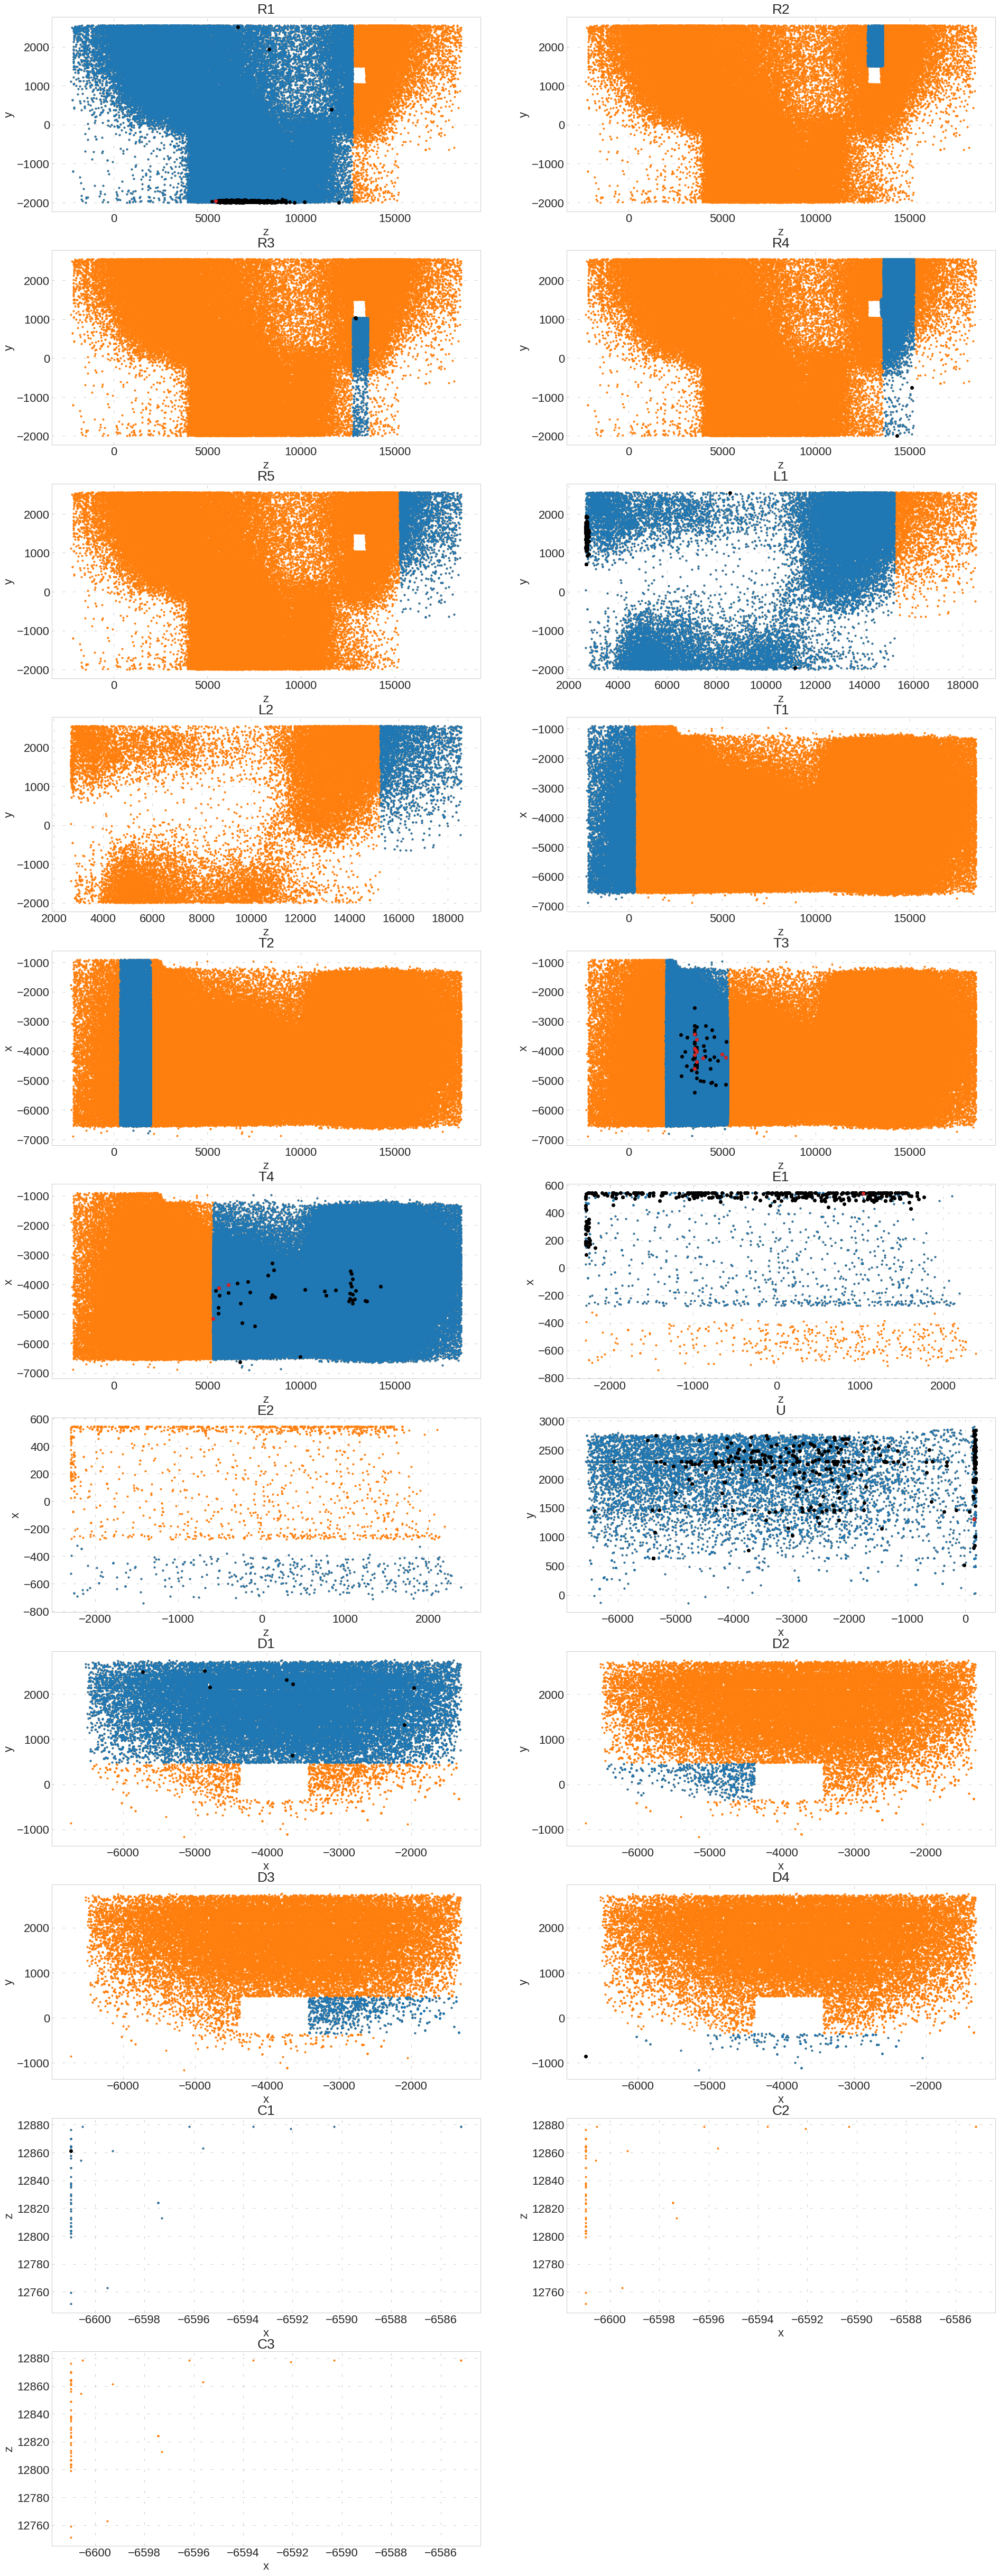

In [ ]:
drawScatterPlots(17000)

Sector Number = 0, Sector type is R
Sector Number = 1, Sector type is R
Sector Number = 2, Sector type is R
Sector Number = 3, Sector type is R
Sector Number = 4, Sector type is R
Sector Number = 5, Sector type is L
Sector Number = 6, Sector type is L
Sector Number = 7, Sector type is T
Sector Number = 8, Sector type is T
Sector Number = 9, Sector type is T
Sector Number = 10, Sector type is T
Sector Number = 11, Sector type is E
Sector Number = 12, Sector type is E
Sector Number = 13, Sector type is U
Sector Number = 14, Sector type is D
Sector Number = 15, Sector type is D
Sector Number = 16, Sector type is D
Sector Number = 17, Sector type is D
Sector Number = 18, Sector type is C
Sector Number = 19, Sector type is C
Sector Number = 20, Sector type is C


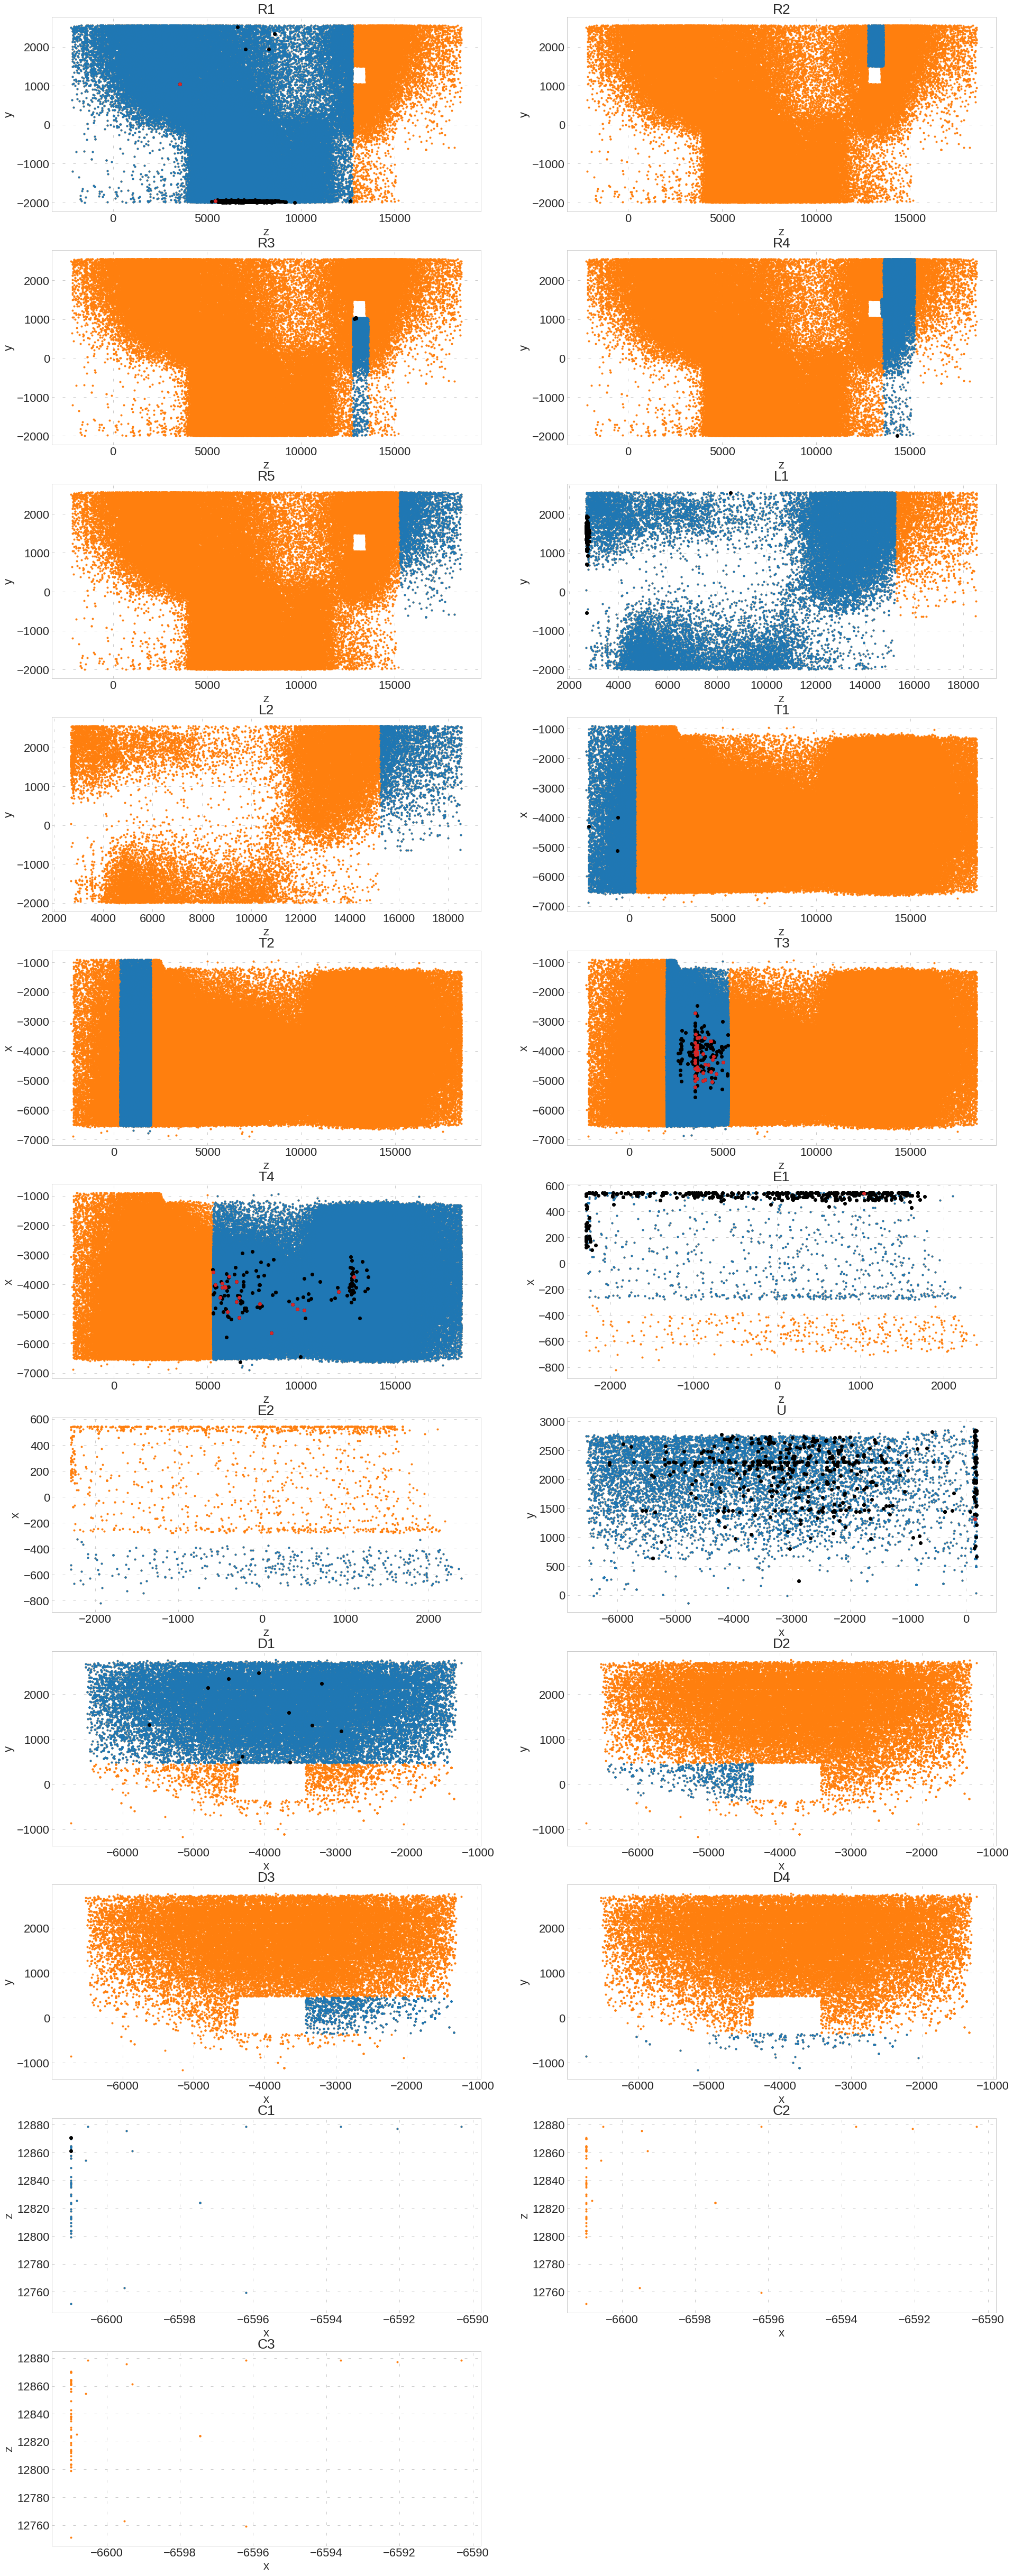

In [ ]:
drawScatterPlots(15000)

Sector Number = 0, Sector type is R
Sector Number = 1, Sector type is R
Sector Number = 2, Sector type is R
Sector Number = 3, Sector type is R
Sector Number = 4, Sector type is R
Sector Number = 5, Sector type is L
Sector Number = 6, Sector type is L
Sector Number = 7, Sector type is T
Sector Number = 8, Sector type is T
Sector Number = 9, Sector type is T
Sector Number = 10, Sector type is T
Sector Number = 11, Sector type is E
Sector Number = 12, Sector type is E
Sector Number = 13, Sector type is U
Sector Number = 14, Sector type is D
Sector Number = 15, Sector type is D
Sector Number = 16, Sector type is D
Sector Number = 17, Sector type is D
Sector Number = 18, Sector type is C
Sector Number = 19, Sector type is C
Sector Number = 20, Sector type is C


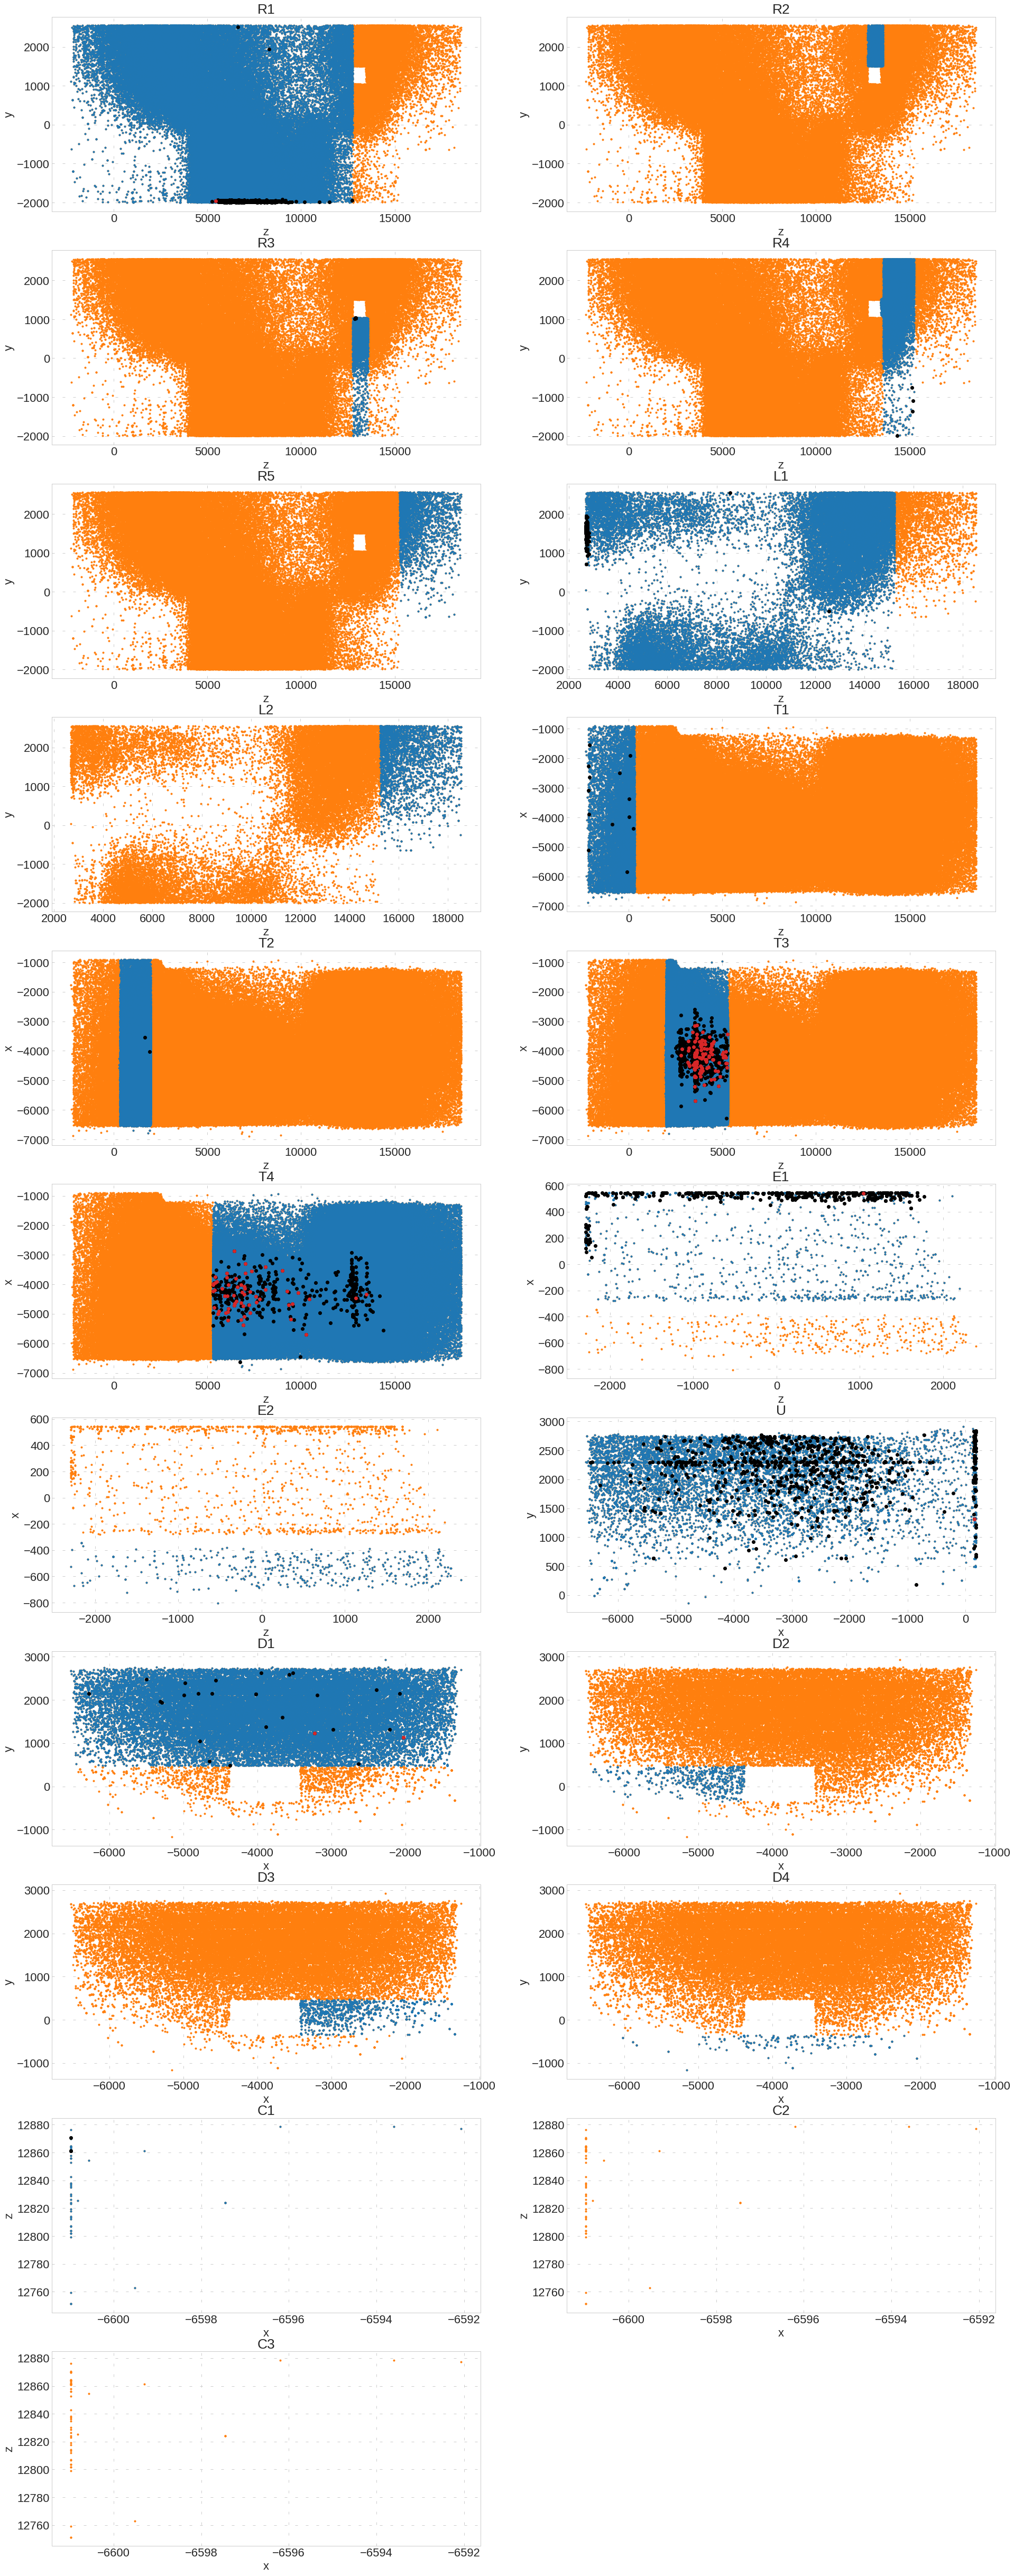

In [ ]:
drawScatterPlots(13000)

In [6]:
def getInefficiency(crvSectorNumber, cut):
  print('Working on sector: %d'%crvSectorNumber)
  ineff=[]
  ineffErr=[]
  lyield=[]
  for ly in range(7000, 17001, 2000): # loop through light yield values
    all, all_err, _, _, _, _ = utils.getNormBackground(dfCRY4, cut+'& abs(_pdgId)==13 & lyield==%d & _crvSectorNumber==%d'%(ly, crvSectorNumber), 1)
    nonvetoed, nonvetoed_err, _, _, _, _ = utils.getNormBackground(dfCRY4, cut+'& abs(_pdgId)==13 & crvinfo__timeWindowStart<0 & lyield==%d & _crvSectorNumber==%d'%(ly, crvSectorNumber), 1)
    #all, all_err, _, _, _, _ = utils.getNormBackground(dfCRY4, cut+'& lyield==%d & _crvSectorNumber==%d'%(ly, crvSectorNumber), 1)
    #nonvetoed, nonvetoed_err, _, _, _, _ = utils.getNormBackground(dfCRY4, cut+'& crvinfo__timeWindowStart<0 & lyield==%d & _crvSectorNumber==%d'%(ly, crvSectorNumber), 1)

    if all==0:
      all = 1

    all = ufloat(all, math.sqrt(all))
    nonvetoed = ufloat(nonvetoed, math.sqrt(nonvetoed))
    ineff.append(unumpy.nominal_values(nonvetoed/all))
    ineffErr.append(unumpy.std_devs(nonvetoed/all))
    lyield.append(ly*utils.LYIELD_SCALE)
  return lyield, ineff, ineffErr, unumpy.nominal_values(all), unumpy.nominal_values(nonvetoed)

In [7]:
dfIneff = pd.DataFrame()
crvSectorNames = list(utils.CRV_SECTOR_NAMES_V7.keys())
for crvSectorNumber in range(0,21):
#for crvSectorNumber in range(0,1):  
  crvSectorName = crvSectorNames[crvSectorNumber]

  lyield, ineff, ineffErr, all, nonvetoed = getInefficiency(crvSectorNumber, cuts.cut_nomom)
  ineff_dict = {'lyield':lyield,
                'ineff':ineff,
                'ineffErr':ineffErr,
                'all':all,
                'nonvetoed':nonvetoed,                
                }
  df_ = pd.DataFrame(ineff_dict)
  df_['crvSectorNumber']=crvSectorNumber
  df_['crvSectorName']=crvSectorName
  df_['cut']='No mom cut'
  dfIneff = dfIneff.append(df_, ignore_index = True)


  lyield, ineff, ineffErr, all, nonvetoed = getInefficiency(crvSectorNumber, 'True')
  ineff_dict = {'lyield':lyield,
                'ineff':ineff,
                'ineffErr':ineffErr,
                'all':all,
                'nonvetoed':nonvetoed,                
                }
  df_ = pd.DataFrame(ineff_dict)
  df_['crvSectorNumber']=crvSectorNumber
  df_['crvSectorName']=crvSectorName
  df_['cut']='No cuts'
  dfIneff = dfIneff.append(df_, ignore_index = True)

  lyield, ineff, ineffErr, all, nonvetoed = getInefficiency(crvSectorNumber, cuts.cut_pid_trkqual_ue)
  ineff_dict = {'lyield':lyield,
                'ineff':ineff,
                'ineffErr':ineffErr,
                'all':all,
                'nonvetoed':nonvetoed,                
                }
  df_ = pd.DataFrame(ineff_dict)
  df_['crvSectorNumber']=crvSectorNumber
  df_['crvSectorName']=crvSectorName
  df_['cut']='PID, TrkQual and UE cut'
  dfIneff = dfIneff.append(df_, ignore_index = True)

Working on sector: 0
Working on sector: 0
Working on sector: 0
Working on sector: 1
Working on sector: 1
Working on sector: 1
Working on sector: 2
Working on sector: 2
Working on sector: 2
Working on sector: 3
Working on sector: 3
Working on sector: 3
Working on sector: 4
Working on sector: 4
Working on sector: 4
Working on sector: 5
Working on sector: 5
Working on sector: 5
Working on sector: 6
Working on sector: 6
Working on sector: 6
Working on sector: 7
Working on sector: 7
Working on sector: 7
Working on sector: 8
Working on sector: 8
Working on sector: 8
Working on sector: 9
Working on sector: 9
Working on sector: 9
Working on sector: 10
Working on sector: 10
Working on sector: 10
Working on sector: 11
Working on sector: 11
Working on sector: 11
Working on sector: 12
Working on sector: 12
Working on sector: 12
Working on sector: 13
Working on sector: 13
Working on sector: 13
Working on sector: 14
Working on sector: 14
Working on sector: 14
Working on sector: 15
Working on sector:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


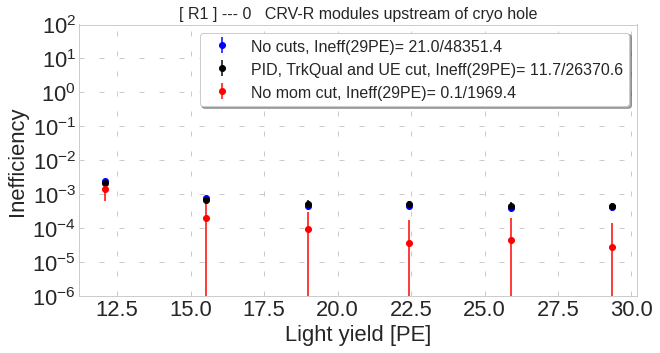

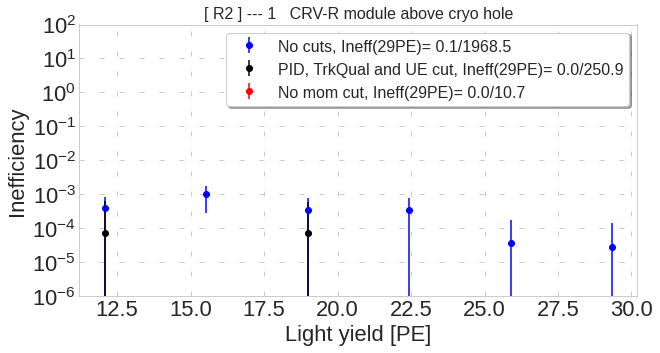

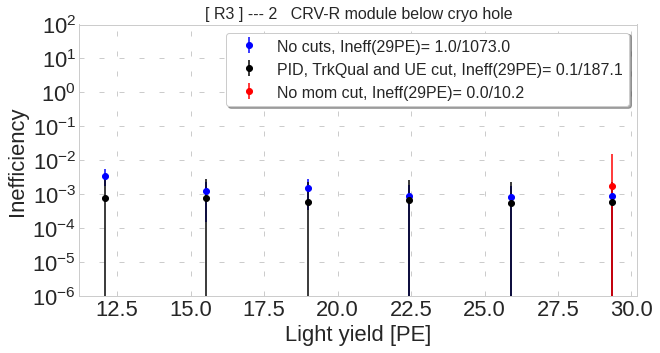

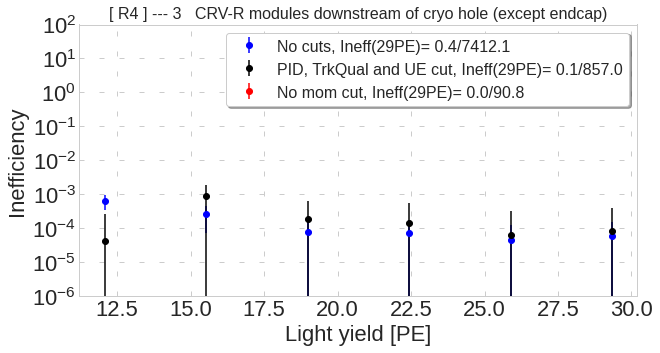

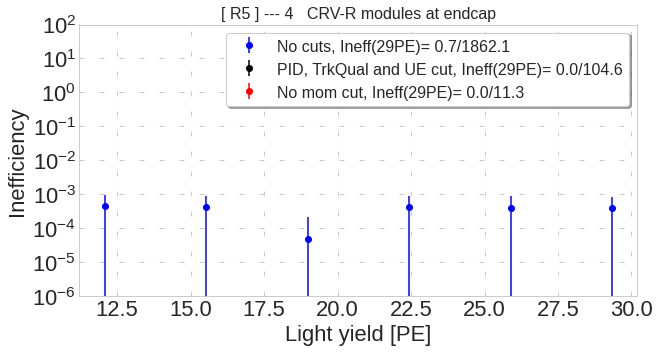

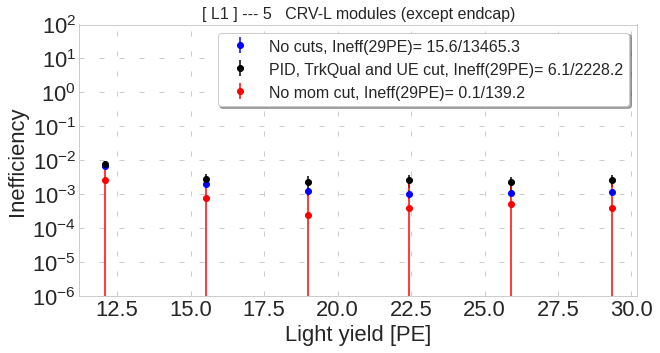

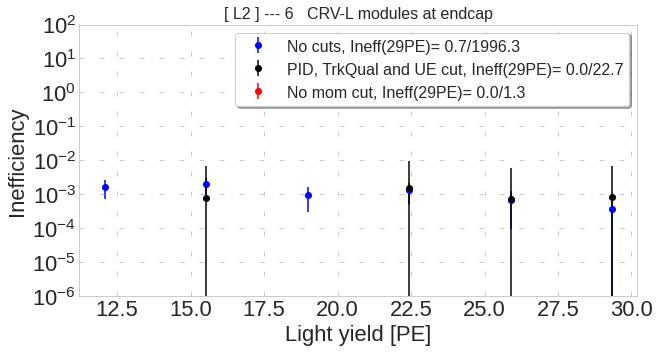

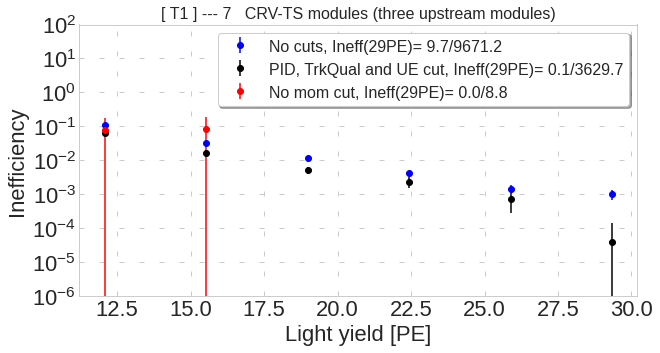

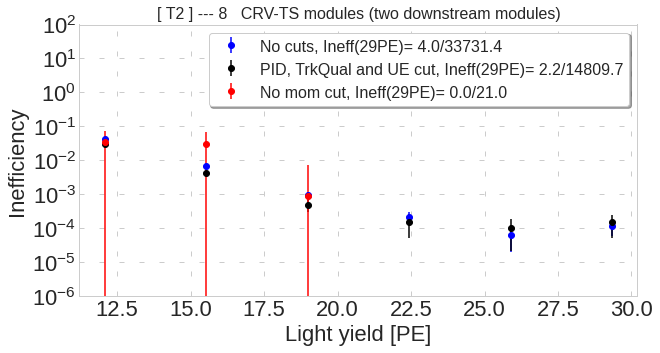

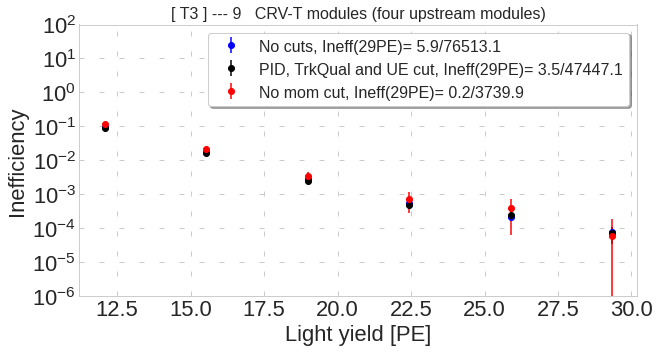

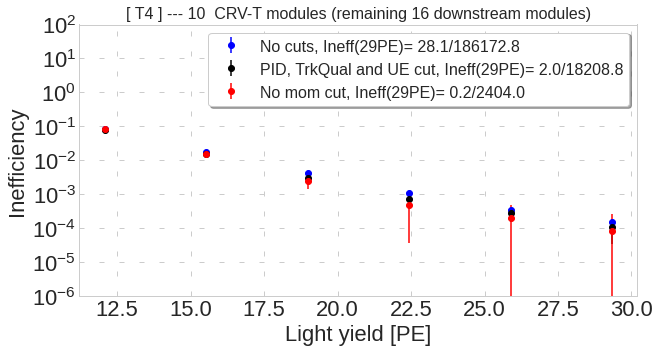

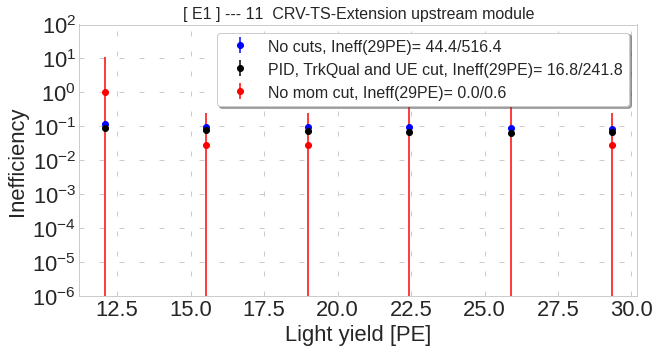

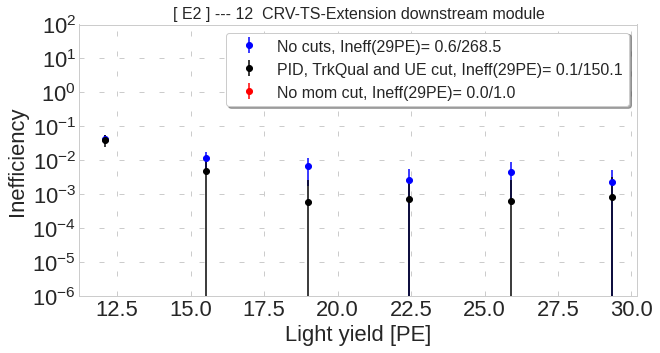

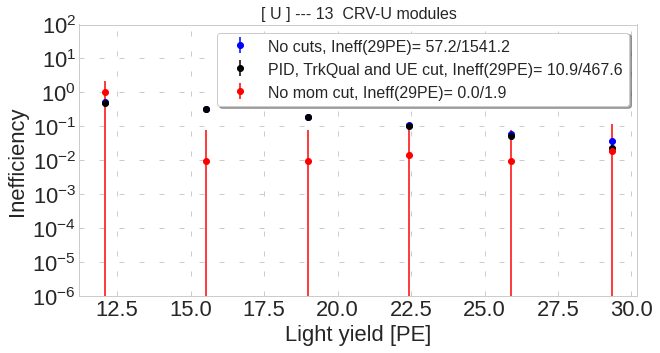

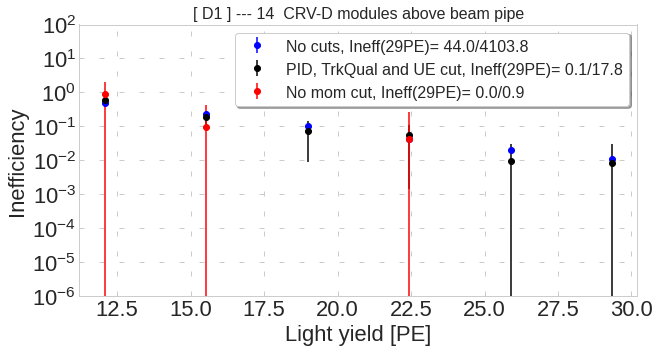

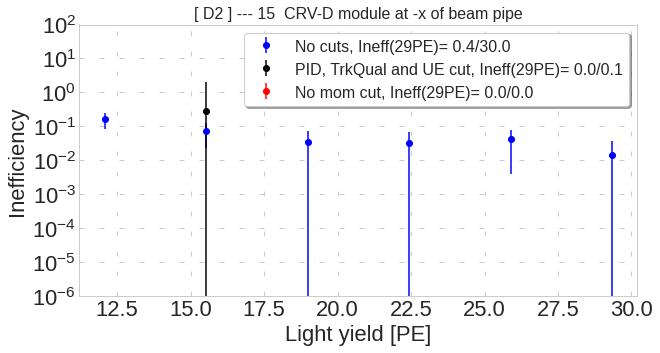

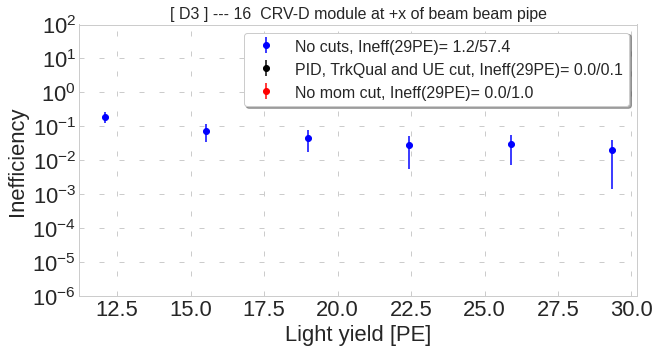

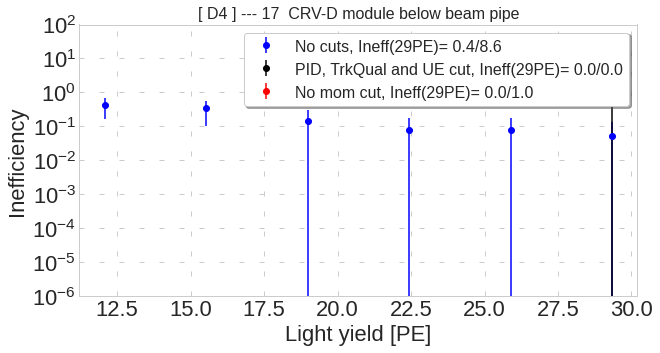

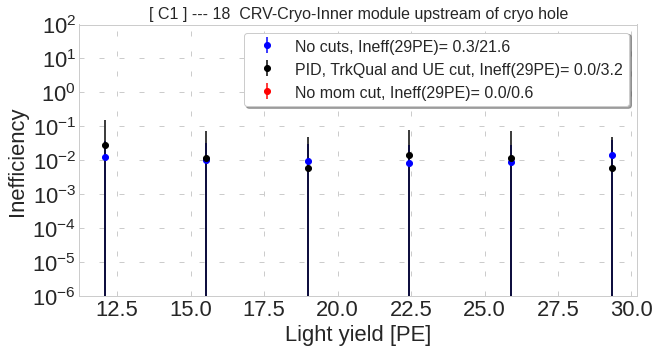

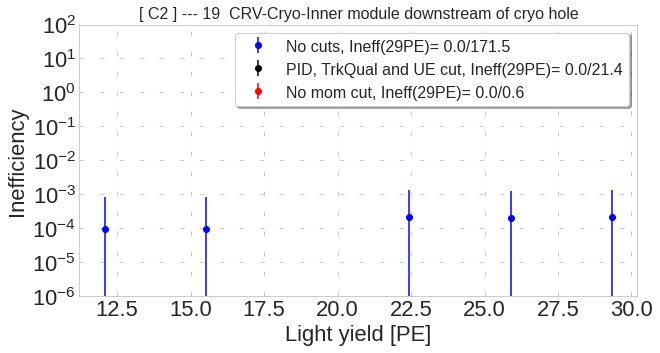

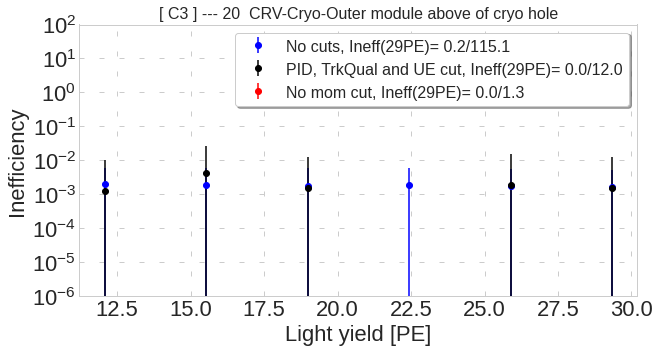

In [ ]:
#for crvSectorNumber in range(0,21):
for crvSectorNumber in range(0,21):  
  plt.figure()
  crvSectorName = crvSectorNames[crvSectorNumber]
  df_ = dfIneff.query('crvSectorName==@crvSectorName & cut=="No cuts"')
  plt.errorbar(df_['lyield'], df_['ineff'], yerr=df_['ineffErr'], ls='None', color='Blue', marker='o', label='No cuts, Ineff(29PE)= %.1f/%.1f'% (df_['nonvetoed'].iloc[0], df_['all'].iloc[0]) )
  df_ = dfIneff.query('crvSectorName==@crvSectorName & cut=="PID, TrkQual and UE cut"')
  plt.errorbar(df_['lyield'], df_['ineff'], yerr=df_['ineffErr'], ls='None', color='Black', marker='o', label='PID, TrkQual and UE cut, Ineff(29PE)= %.1f/%.1f'% (df_['nonvetoed'].iloc[0], df_['all'].iloc[0]) )
  df_ = dfIneff.query('crvSectorName==@crvSectorName & cut=="No mom cut"')
  plt.errorbar(df_['lyield'], df_['ineff'], yerr=df_['ineffErr'], ls='None', color='Red', marker='o', label='No mom cut, Ineff(29PE)= %.1f/%.1f'% (df_['nonvetoed'].iloc[0], df_['all'].iloc[0]) )

  plt.title("[ " + crvSectorName + " ] --- " + utils.CRV_SECTOR_NAMES_V7[crvSectorName], fontsize=16)
  plt.yscale('log')
  plt.xlabel('Light yield [PE]')
  plt.ylabel('Inefficiency')
  #plt.ylim(1e-6, 1)
  plt.ylim(1e-6, 100)
  plt.locator_params(axis="y", numticks=10)
  plt.legend(loc='upper right', frameon=True, shadow=True, fontsize='16')
  #plt.show()
  plt.savefig("drive/MyDrive/Mu2e/ImagesFromColab/%s_Efficiency_all_pdgIds" % crvSectorName)